<a href="https://colab.research.google.com/github/khush3718/Indian-Politicians-Sentiment-Analysis/blob/main/Indian_Politics_Analysis_using_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
pd.options.display.max_colwidth=1000

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Analysis of tweets regarding Mr. Narendra Modi


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Indian Politics twitter data/Narendra Modi_data.csv")
df.head()

,Date,User,Tweet,Time
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38
2,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02
3,2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25


In [5]:
df.shape

(70000, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [7]:
#Checking for null values
df.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

no null values are present

# handling regular expression

In [8]:
# Function for removing @user name ,http urls ,# like some symbols

def remove_usernames_links(tweet):
    s2 = re.sub('http://\S+|https://\S+', '', tweet)
    s1=re.sub(r"#[a-zA-Z0-9\\n@_\s]+","",s2)
    return s1

In [9]:
# function for removing emojis


def remove_emoji(txt):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', txt)

In [12]:
#using stopwords
stp=stopwords.words('english')
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
#Functions for cleaning tweets and for polarity , subjectivity & Segmentation calculation

def TweetCleaning(tweet):
    link_removal=remove_usernames_links(tweet)
    emoji_removal=remove_emoji(link_removal)
    after_stopword_removal=' '.join(word for word in emoji_removal.split()if word not in stp)
    return after_stopword_removal

def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity


def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return 'positive'
    elif tweet == 0 :
        return 'neutral'
    else:
        return 'negative'

In [14]:
# Creating New Columns

df["CleanedTweet"]=df["Tweet"].apply(TweetCleaning)
df['tPolarity']=df['CleanedTweet'].apply(calcPolarity)
df['tSubjectivity']=df['CleanedTweet'].apply(calcSubjectivity)
df['segmentation']=df['tPolarity'].apply(segmentation)

In [15]:
df.head()

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
0,2022:10:19,QuestionsBotYT,Is Narendra Modi a toaster?,23:57:08,Is Narendra Modi toaster?,0.0000,0.00,neutral
1,2022:10:19,PaperDabba,"5G About To Bring Major Change, Will Revolutio...",23:56:38,"5G About To Bring Major Change, Will Revolutio...",0.0625,0.50,positive
2,2022:10:19,mnjworldcom123,Prime Minister Shri Narendra Modi along with H...,23:51:02,Prime Minister Shri Narendra Modi along H.E. M...,0.0250,0.25,positive
3,2022:10:19,BravePedestrian,Bharat Mata has waited 5000 years for a true s...,23:40:58,Bharat Mata waited 5000 years true son like Na...,0.3500,0.65,positive
4,2022:10:19,NaMoPraveenKor,How Narendra Modi’s game-changing Gati Shakti ...,23:34:25,How Narendra Modi’s game-changing Gati Shakti ...,0.0000,0.00,neutral


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tPolarity'].plot(kind='hist', bins=20, title='tPolarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['tSubjectivity'].plot(kind='hist', bins=20, title='tSubjectivity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('User').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('CleanedTweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='tPolarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='tPolarity', y='tSubjectivity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tPolarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('User')):
  _plot_series(series, series_name, i)
  fig.legend(title='User', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tPolarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tPolarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tPolarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tPolarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tPolarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['tPolarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CleanedTweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='CleanedTweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('tPolarity')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['tPolarity'].plot(kind='line', figsize=(8, 4), title='tPolarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['tSubjectivity'].plot(kind='line', figsize=(8, 4), title='tSubjectivity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tweet'].value_counts()
    for x_label, grp in _df_16.groupby('User')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('User')
_ = plt.ylabel('Tweet')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Time'].value_counts()
    for x_label, grp in _df_17.groupby('Tweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Tweet')
_ = plt.ylabel('Time')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['CleanedTweet'].value_counts()
    for x_label, grp in _df_18.groupby('Time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time')
_ = plt.ylabel('CleanedTweet')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['segmentation'].value_counts()
    for x_label, grp in _df_19.groupby('CleanedTweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CleanedTweet')
_ = plt.ylabel('segmentation')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['User'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='User', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='index', y='Tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='index', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['CleanedTweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='CleanedTweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Analysis & Visualization

In [16]:
#Checking number of +ve ,-ve & neutral tweets
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,4102
neutral,39087
positive,26811


# Word cloud for modiji

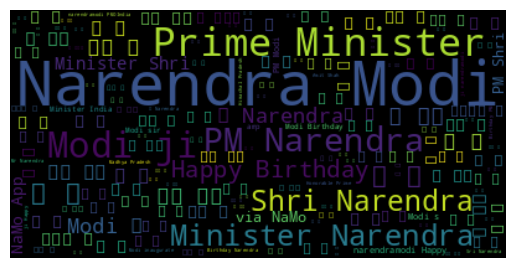

In [17]:
consolidated=' '.join(word for word in df ['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Scatter plots


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


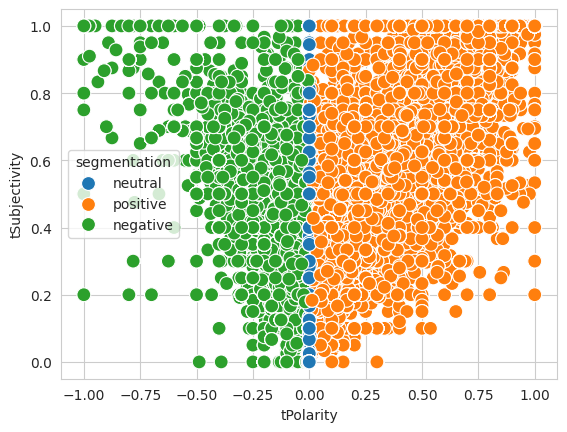

In [18]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(data=df,x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

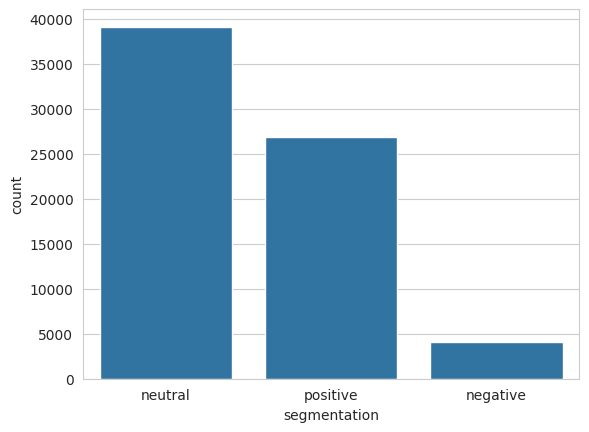

In [19]:
sns.countplot(data=df,x='segmentation')

# Analysis for Rahul Gandhi

In [20]:
df_raga = pd.read_csv('/content/drive/MyDrive/Indian Politics twitter data/Rahul Gandhi_data.csv')
df_raga.head()

,Date,User,Tweet,Time
0,2022:10:19,MdIjran,@JaikyYadav16 इन विकल्पों में से और अभी के समय...,23:55:49
1,2022:10:19,28bde43dae3c430,@ndtv Rahul Gandhi left congress in the mid ro...,23:53:30
2,2022:10:19,SkAnzar5,@JaikyYadav16 Rahul Gandhi,23:32:16
3,2022:10:19,HariRamDamor2,rahul Gandhi ji is real hero of india.,23:32:09
4,2022:10:19,srinivas_das,Rahul Gandhi is getting massive support in And...,23:21:18


In [21]:
df_raga.shape

(70000, 4)

In [22]:
df_raga.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [23]:
df_raga.isnull().sum()

Date     0
User     0
Tweet    0
Time     0
dtype: int64

handling regular expresssions

In [25]:
# Creating New Columns

df_raga["CleanedTweet"]=df_raga["Tweet"].apply(TweetCleaning)
df_raga['tPolarity']=df_raga['CleanedTweet'].apply(calcPolarity)
df_raga['tSubjectivity']=df_raga['CleanedTweet'].apply(calcSubjectivity)
df_raga['segmentation']=df_raga['tPolarity'].apply(segmentation)

In [26]:
df_raga.tail()

,Date,User,Tweet,Time,CleanedTweet,tPolarity,tSubjectivity,segmentation
69995,2022:09:24,Dilipmakwana181,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi...,13:39:10,@BharatJSoni @dranupmodgil Ye chunawala 2 kodi...,0.000000,0.000000,neutral
69996,2022:09:24,RoshanKrRaii,Even Rahul Gandhi's fiercest critics like myse...,13:38:21,Even Rahul Gandhi's fiercest critics like wild...,-0.642857,0.771429,negative
69997,2022:09:24,NewsShakes,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" is Rah...",13:38:07,"BHATTACHARJEE SHYAMAL: A "" PSHYCOPATH "" Rahul ...",0.000000,0.000000,neutral
69998,2022:09:24,ayaz_karbelkar,@priyankac19 @MinistryWCD She is cooking 'hate...,13:37:59,@priyankac19 @MinistryWCD She cooking 'hate pu...,-0.650000,0.887500,negative
69999,2022:09:24,PD75058926,@INCIndia Rahul Gandhi video share karo,13:37:42,@INCIndia Rahul Gandhi video share karo,0.000000,0.000000,neutral


In [28]:
#Checking number of +ve ,-ve & neutral tweets
df_raga.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,7162
neutral,42418
positive,20420


Word cloud for rahul gandhi

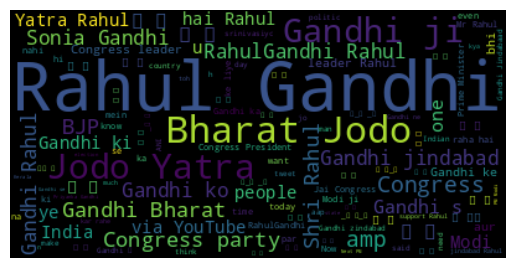

In [29]:
consolidated=' '.join(word for word in df_raga['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

scatter plots

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

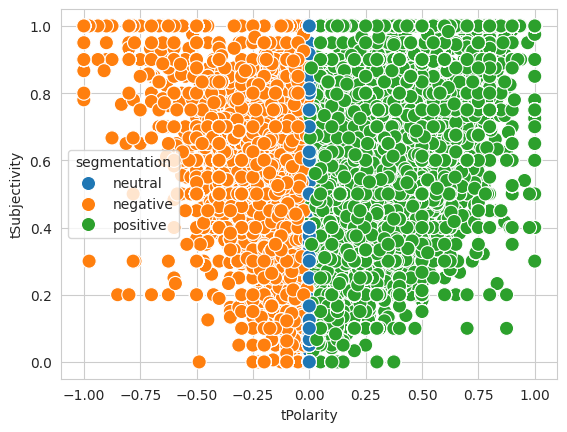

In [30]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(data=df_raga,x='tPolarity',y='tSubjectivity',s=104,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

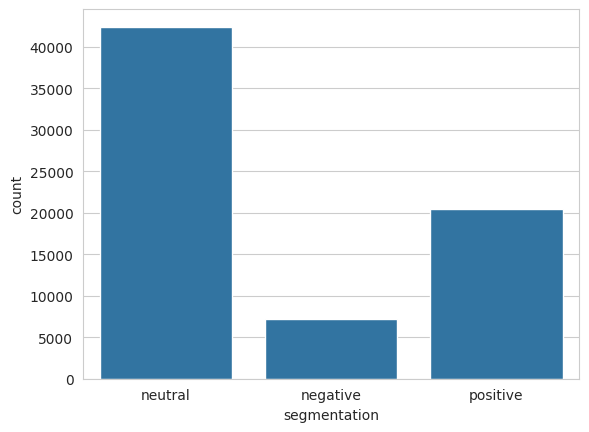

In [31]:
sns.countplot(data=df_raga,x='segmentation')

# Analysis for Arvind kejriwal


In [32]:
df_ak = pd.read_csv('/content/drive/MyDrive/Indian Politics twitter data/Arvind Kejriwal_data.csv')
df_ak.head()

,Date,User,Tweet,Time
0,2022:10:19,bhoo_sene,@TajinderBagga Aap leaders are speaking agains...,23:47:01
1,2022:10:19,Madhusu88858324,Bjp Aap se sikh rhi h\nNarendra Modi Manish Si...,23:06:35
2,2022:10:19,PremshilaKumarp,@JaikyYadav16 Arvind kejriwal,22:56:42
3,2022:10:19,lifebecom,Arvind Kejriwal As PM Visits Gujarat School ht...,22:20:51
4,2022:10:19,sphavisha,Arvind Kejriwal's stand against rape is very c...,22:20:16


In [33]:
df_ak.shape

(70000, 4)

In [34]:
df_ak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    70000 non-null  object
 1   User    70000 non-null  object
 2   Tweet   70000 non-null  object
 3   Time    70000 non-null  object
dtypes: object(4)
memory usage: 2.1+ MB


In [35]:
# Creating New Columns

df_ak["CleanedTweet"]=df_ak["Tweet"].apply(TweetCleaning)
df_ak['tPolarity']=df_ak['CleanedTweet'].apply(calcPolarity)
df_ak['tSubjectivity']=df_ak['CleanedTweet'].apply(calcSubjectivity)
df_ak['segmentation']=df_ak['tPolarity'].apply(segmentation)


In [36]:
#Checking number of +ve ,-ve & neutral tweets
df_ak.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,8569
neutral,42980
positive,18451


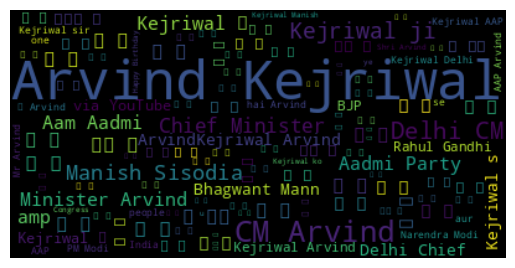

In [37]:
consolidated=' '.join(word for word in df_ak['CleanedTweet'])
wordCloud=WordCloud(width=400,height=200,random_state=20,max_font_size=119).generate(consolidated)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

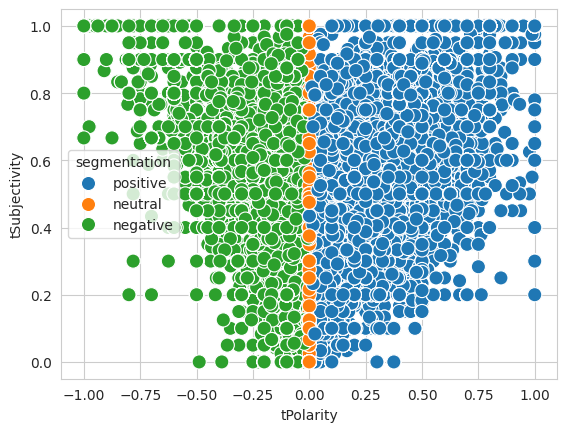

In [38]:
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(data=df_ak
,x='tPolarity',y='tSubjectivity',s=104,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

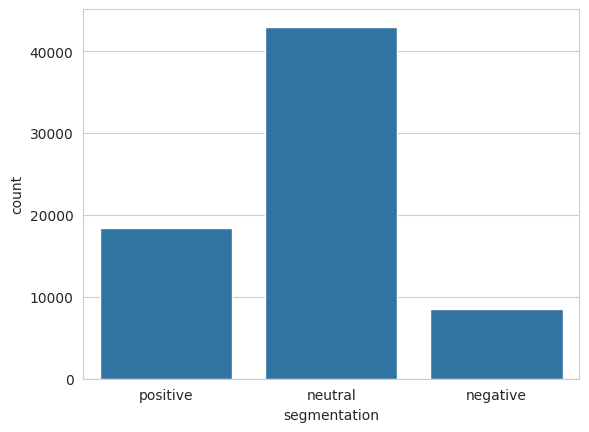

In [39]:
sns.countplot(data=df_ak,x='segmentation')